# Blinkit Analysis
## Business Requirement
To conduct a comprehensive analysis of Blinkit's sales performance, customer satisfaction , and inventory distribution to identify key insights and opportunities for optimization using various KPIs and visualizations.

**KPI's Requirement**
1. Total sales: The overall revenue generated from all items sold.
2. Average sales: The average revenue per sale.
3. Number of Items: The total count of different items sold.
4. Average Rating: The average customer rating for items sold.

**Chart's Requirement**
1. Total Sales by Fat Content:
   * Objective: Analyze the impact of fat content of the total sales.
   * Additional KPI Metrics: Assess how other KPIs (average sales, number of items, average rating) vary with fat content.
   * Chart Type: Donut Chart
2. Total Sales by Item Type:
   * Objective: Identify the performance of different items types in terms of total sales.
   * Additional KPI Metrics: Assess how other KPIs (average sales, number of items, average rating) vary with fat content.
   * Chart Type: Bar Chart
3. Fat Content by Outlet for Total Sales:
   * Objective: Compare total sales across different outlets segmentd by fat content.
   * Additional KPI Metrics: Assess how other KPIs (average sales, number of items, average rating) vary with fat content.
   * Chart Type: Stacked Column Chart
4. Total Sales by Outlet Establishment:
   * Objective: Evaluate how the or type of Outlet establishment influences total sales.
   * Chart Type: Line Chart
5. Sale by Outlet Size:
   * Objective: Analyze the correlation between outlet size and total sales.
   * Chart Type: Donut/Pie Chart
6. Sales by Outlet Location:
   * Objective: Assess the geographic distribution of sales across different locations.
   * Chart Type: Funnel Map
   

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Raw Data

In [2]:
df = pd.read_csv(r"C:\Users\ojoar\Desktop\data_set\blinkIT_grocery_data\BlinkIT Grocery Data.csv")

### Sample Data

In [3]:
df.head(20)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2014,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,FDX25,Canned,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


### Size of Data

In [4]:
print("Size of Data:   ", df.shape)

Size of Data:    (8523, 12)


### Field Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Data Cleaning

In [6]:
df['Item Fat Content'] = df['Item Fat Content'].replace({"LF": "Low Fat", 
                                                         "low fat": "Low Fat", 
                                                         "reg": "Regular"})

In [7]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

### **Business Requirements**

### **KPI's Requirements**

In [16]:
#Total sales 
total_sales = df["Sales"].sum()

#Average Sales
avg_sales = df["Sales"].mean()

#No. of Items sold
no_of_items_sold = df["Sales"].count()

#Average Rating
avg_rating = df["Rating"].mean()

#Display
print(f"Total Sales: ${total_sales:,.2f}")
print(f"Average Sales: ${avg_sales:,.2f}")
print(f"No. of Items Sold: {no_of_items_sold:,}")
print(f"Average Rating: {avg_rating:.1f}")

Total Sales: $1,201,681.49
Average Sales: $140.99
No. of Items Sold: 8,523
Average Rating: 4.0


### **Chart's Requirement**

#### **Total Sales by Fat Content**

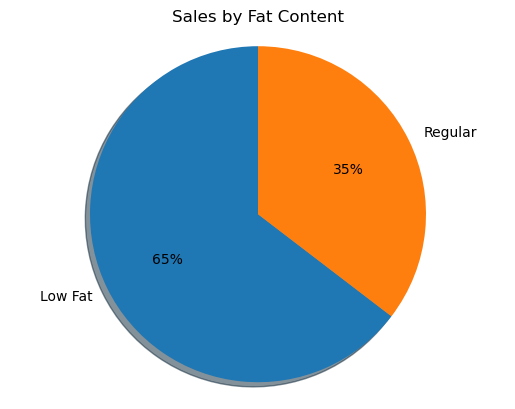

In [32]:
sales_by_fat = df.groupby("Item Fat Content")["Sales"].sum()

plt.pie(sales_by_fat, labels=sales_by_fat.index, autopct="%.0f%%", startangle=90, shadow=True)
plt.title("Sales by Fat Content")
plt.axis("equal")

plt.show()

#### **Total Sales by Item Type**

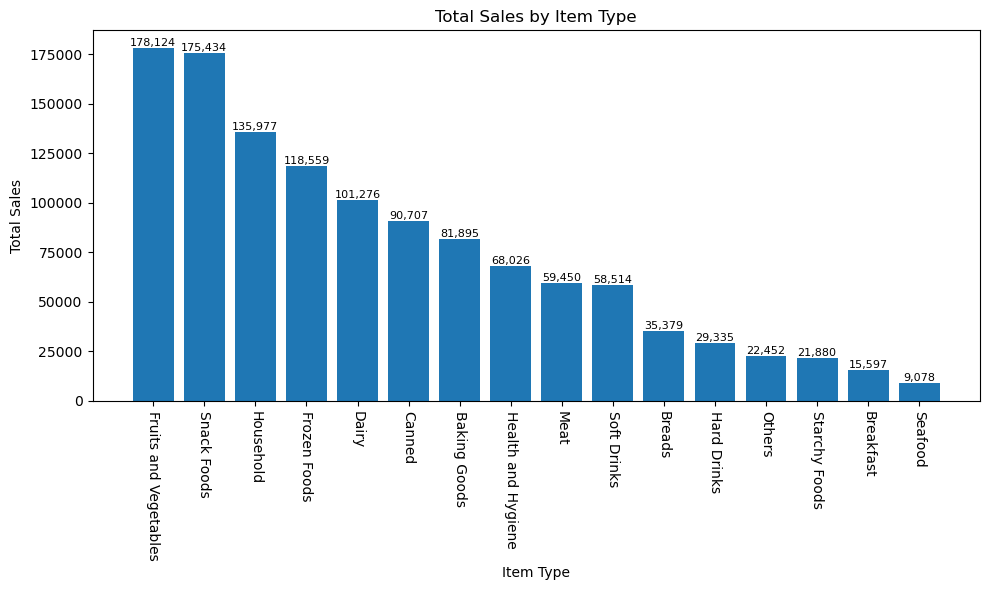

In [41]:
sales_by_type = df.groupby("Item Type")["Sales"].sum().sort_values(ascending = False)

plt.figure(figsize=(10,6))
bars = plt.bar(sales_by_type.index, sales_by_type.values)

plt.xticks(rotation=-90)
plt.xlabel("Item Type")
plt.ylabel("Total Sales")
plt.title("Total Sales by Item Type")

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
            f"{bar.get_height():,.0f}", ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


#### **Fat Content by Outlet for Total Sales**

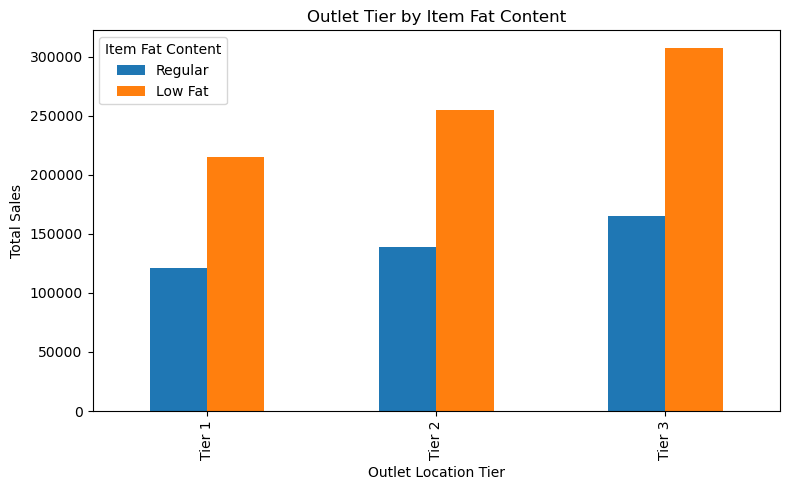

In [49]:
grouped = df.groupby(["Outlet Location Type", "Item Fat Content"])["Sales"].sum().unstack()
grouped = grouped[['Regular', 'Low Fat']]

ax = grouped.plot(kind = 'bar', figsize=(8,5), title = "Outlet Tier by Item Fat Content")
plt.xlabel("Outlet Location Tier")
plt.ylabel("Total Sales")
plt.legend(title="Item Fat Content")
plt.tight_layout()

plt.show()

### **Total Sales by Outlet Establishment**

In [56]:
df["Outlet Establishment Year"].unique()

array([2012, 2022, 2016, 2014, 2015, 2020, 2011, 2018, 2017])

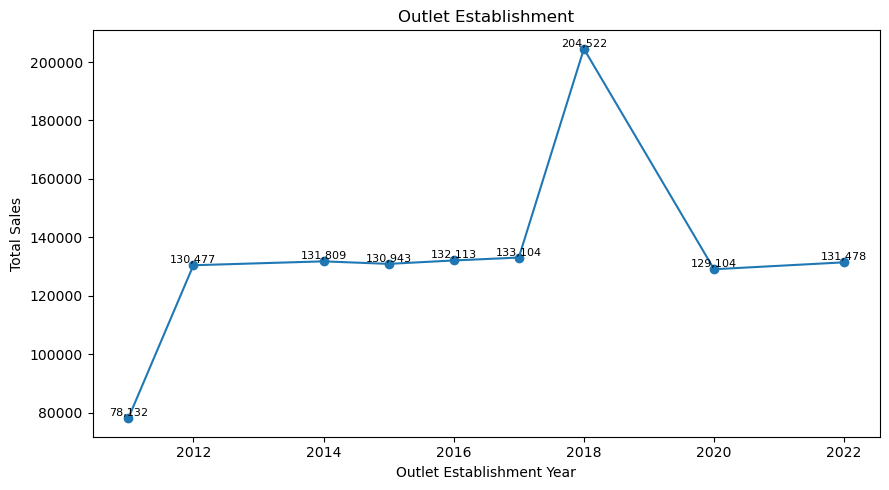

In [55]:
sales_by_year = df.groupby("Outlet Establishment Year")["Sales"].sum().sort_index()

plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')

plt.xlabel("Outlet Establishment Year")
plt.ylabel("Total Sales")
plt.title("Outlet Establishment")

for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x,y, f"{y:,.0f}", ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

### **Sale by Outlet Size**

In [61]:
df["Outlet Size"].unique()

array(['Medium', 'Small', 'High'], dtype=object)

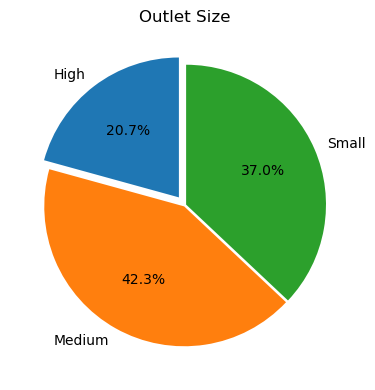

In [65]:
sales_by_size = df.groupby("Outlet Size")["Sales"].sum()

plt.figure(figsize=(4,4))
plt.pie(sales_by_size, labels=sales_by_size.index, autopct='%1.1f%%', startangle=90, explode= (0.07, 0.01, 0.01))
plt.title("Outlet Size")

plt.tight_layout()
plt.show()

### **Sales by Outlet Location**

In [66]:
df.head(2)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.1,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.8,115.3492,5.0


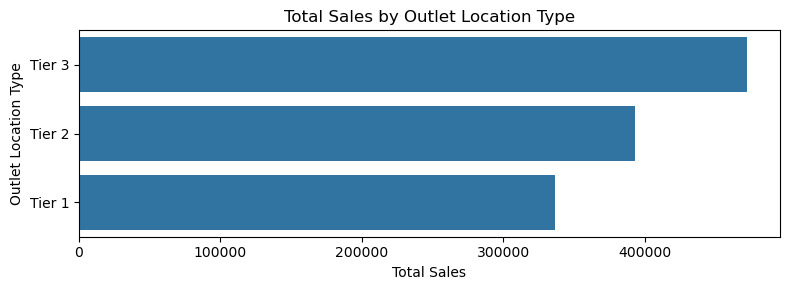

In [70]:
sales_by_location = df.groupby("Outlet Location Type")["Sales"].sum().reset_index()
sales_by_location = sales_by_location.sort_values("Sales", ascending=False)

plt.figure(figsize=(8, 3))
ax = sns.barplot(x="Sales", y="Outlet Location Type", data = sales_by_location)

plt.title("Total Sales by Outlet Location Type")
plt.xlabel("Total Sales")
plt.ylabel("Outlet Location Type")

plt.tight_layout()
plt.show()